In [1]:
#Here to
import numpy as np
import pandas as pd
import scipy.stats as stats

import matplotlib.pyplot as plt
from matplotlib import gridspec
plt.style.use('ggplot')
plt.rcParams.update({'font.size': 16})
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['axes.facecolor'] = 'white'
plt.rcParams['grid.color'] = 'lightgrey'
# docker start sparkbook
import pyspark as ps

spark = (ps.sql.SparkSession.builder 
        .master("local[6]") 
        .appName("case study") 
        .getOrCreate()
        )
sc = spark.sparkContext

In [2]:
import nltk
from nltk.corpus import stopwords
en_stop = ['au', 'aux', 'avec', 'ca' 'ce', 'ces', 'cest', 'dans', 'de', 'des', 
           'du', 'elle', 'en', 'et', 'eux', 'il', 'ils', 'je', 'la', 
           'le', 'les', 'leur', 'lui', 'ma', 'mais', 'me', 'même', 
           'mes', 'moi', 'mon', 'ne', 'nos', 'notre', 'nous', 'on', 
           'ou', 'par', 'pas', 'pour', 'qu', 'que', 'qui', 'sa', 'se', 
           'ses', 'son', 'sur', 'ta', 'te', 'tes', 'toi', 'ton', 'tu', 
           'un', 'une', 'vos', 'votre', 'vous', 'c', 'd', 'j', 'l', 'à', 
           'm', 'n', 's', 't', 'y', 'été', 'étée', 'étées', 'étés', 
           'étant', 'étante', 'étants', 'étantes', 'suis', 'es', 'est', 
           'sommes', 'êtes', 'sont', 'serai', 'seras', 'sera', 'serons', 
           'serez', 'seront', 'serais', 'serait', 'serions', 'seriez', 
           'seraient', 'étais', 'était', 'étions', 'étiez', 'étaient', 
           'fus', 'fut', 'fûmes', 'fûtes', 'furent', 'sois', 'soit', 
           'soyons', 'soyez', 'soient', 'fusse', 'fusses', 'fût', 
           'fussions', 'fussiez', 'fussent', 'ayant', 'ayante', 
           'ayantes', 'ayants', 'eu', 'eue', 'eues', 'eus', 'ai', 'as', 
           'avons', 'avez', 'ont', 'aurai', 'auras', 'aura', 'aurons', 
           'aurez', 'auront', 'aurais', 'aurait', 'aurions', 'auriez', 
           'auraient', 'avais', 'avait', 'avions', 'aviez', 'avaient', 
           'eut', 'eûmes', 'eûtes', 'eurent', 'aie', 'aies', 'ait', 
           'ayons', 'ayez', 'aient', 'eusse', 'eusses', 'eût', 'eussions',
           'eussiez', 'eussent','i', 'me', 'my', 'myself', 'we', 'our', 
           'ours', 'ourselves', 'you', "you're", "you've", "you'll", 
           "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 
           'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', 
           "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 
           'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', 
           "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 
           'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 
           'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 
           'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 
           'with', 'about', 'against', 'between', 'into', 'through', 'during',
           'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 
           'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 
           'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 
           'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 
           'nor', 'not', 'only', 'own', 'same', 'so', 'than', 'too', 'very', 's', 
           't', 'can', 'will', 'just', 'don', "don't", 'should', "should've", 'now',
           'd', 'll', 'm', 'o', 're', 've', 'y', 'ain', 'aren', "aren't", 'couldn', 
           "couldn't", 'didn', "didn't", 'doesn', "doesn't", 'hadn', "hadn't", 
           'hasn', "hasn't", 'haven', "haven't", 'isn', "isn't", 'ma', 'mightn', 
           "mightn't", 'mustn', "mustn't", 'needn', "needn't", 'shan', "shan't", 
           'shouldn', "shouldn't", 'wasn', "wasn't", 'weren', "weren't", 'won',
           "won't", 'wouldn', "wouldn't", 'si']

In [3]:
df_json = spark.read.json('../data/french_tweets.json')

# create a temporary table for spark.sql queries
df_json.createOrReplaceTempView('temp1')

In [4]:
nlp_sql1 = spark.sql('''
SELECT lang , text,created_at, possibly_sensitive, quoted_status.favorite_count
FROM temp1
WHERE lang = 'en' and possibly_sensitive = "True";
''').collect()

In [33]:
nlp_sql2 = spark.sql('''
SELECT lang , text,created_at, possibly_sensitive, quoted_status.retweet_count
FROM temp1
WHERE lang = 'en' and possibly_sensitive = "False";
''').collect()

In [10]:
#try and search/identify for Porn type text among tweets
#among sensitive tweets with lots of re_tweets or likes_ examine more closely 
###perhaps deep dive among some volume of like_counts or re_tweet count top 5%? 
nlp_sql1[:3]

[Row(lang='en', text='The Old Blind Guitarist by Pablo Picasso https://t.co/qNxPnN3jI7', created_at='Wed Apr 26 13:34:36 +0000 2017', possibly_sensitive=True, favorite_count=None),
 Row(lang='en', text='Futur achat 😘 https://t.co/DASepOFASa', created_at='Wed Apr 26 13:34:42 +0000 2017', possibly_sensitive=True, favorite_count=23),
 Row(lang='en', text='SCH - Comme si https://t.co/vaPuC4bxYp', created_at='Wed Apr 26 14:42:10 +0000 2017', possibly_sensitive=True, favorite_count=None)]

In [ ]:
#Create a function to filter symbols from nlp_sql1

In [6]:
def clean_text(row):
    to_remove = '''!_~^(){}@:'$%"\,-[]<>./?;#&*'''''
    return ''.join([item for item in row if item not in to_remove]) 

In [7]:
def get_counts(sql_results):
    '''
    input = spark list_of_rows
    does = cleaning of string
    output= favorites,string
    '''
    countz = {}
    for index,item in enumerate(sql_results):
        clean =clean_text(item[1])
        #print(clean)
        favs = str(item[4])
        countz[index] = (favs,clean)
    #now have a dict of likes/tweet_text
    return countz

countz = get_counts(sql_results = nlp_sql1)


In [34]:
countz2 = get_counts(sql_results = nlp_sql2)

In [36]:
#print(countz[109]) -- > ('None', 'new Blackedcom trailer with the gorgeous MBlueEyesXxX \n
                                    # please RT and follow me and Markenna httpstcoNGWSjEZap4')
def clean_http():
    lst = []
    for k,v in countz2.items(): #countz or countz2
        v_ = v[1].split(' ')
        del v_[-1]
        for item in v_:
            lst.append(item)
    return lst
no_http2 = clean_http() 

In [17]:
# print (no_http[2:10]) --> ['Blind', 'Guitarist', 'by', 'Pablo', 'Picasso', 'Futur', 'achat', '😘']
#still not able to remove emojies

In [35]:
# Inputs for below could could be as follows
# 202: ('None', 'so i went to a party tonight amp asked for the new shawns music and they played stitches WELL httpstcoWHoGPRcv3s'), 
# 203: ('50', '5 millions  httpstcoJGyUNbunZV')

def somefunct(x):
    word_dict = {}
    counter =0

    for k,v in x.items():
        counter += 1
        likez = v[0] 
        v=list(v[1].split(' ')) #convert text in list of words
        #example_output for (v) --> ['The', 'Old', 'Blind', 'Guitarist', 'by', 'Pablo', 'Picasso', 'httpstcoqNxPnN3jI7']

        for item in v: # for each word in the list 
            v_ = [item]
            boozl =''
            boozl = likez
            if boozl == 'None': #workaround for dealing with None strings
                likez = 'Nope' 
            if item not in word_dict:  
                if boozl != 'Nope':
                    word_dict[item] = list([boozl])
            else:
                if boozl != 'Nope':
                    word_dict[item].append( boozl )
    return word_dict

somefunct_output = somefunct(countz2)  #countz or countz2

# acum=0
# for item in somefunct_output.values():
#     unravel = len([x for x in item])
#     acum+=unravel
# print(acum) --> 602 #Count of words <with overlap however 4/26 --> or someother time remove overlap ?

In [23]:
stringz = ' '.join([i for i in no_http])

In [37]:
stringz2 = ' '.join([i for i in no_http2])

In [78]:
print(len('😘'))
import demoji
demoji.download_codes()

1
... OK (Got response in 0.34 seconds)
Writing emoji data to /home/jovyan/.demoji/codes.json ...
... OK


In [38]:
import re
import sys

# https://stackoverflow.com/a/49146722/330558
def remove_emoji(stringz):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', stringz2)

if __name__ == '__main__':
    
    text2 = remove_emoji(stringz2) # either stringz or stringz2
    print(type(text2))

<class 'str'>


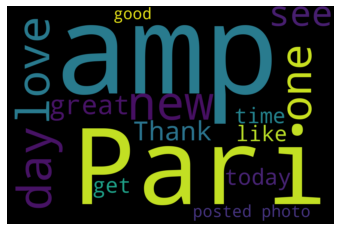

In [41]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
import matplotlib.pyplot as plt
wordcloud = WordCloud(stopwords=en_stop , 
                      width=1200, 
                      height=800, 
                      min_word_length=3,
                      max_words=15).generate(text2)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.savefig('enFAL_cloud_top15.png')
plt.show()